In [1]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("modern_ship_data.csv")
df

,Unnamed: 0,yr,mo,dy,hr,dck,id,lat,lon,w,d
0,415,2021,1,1,0,992,AMOUK05,51.9,4.1,NaN,NaN
1,480,2021,1,1,0,992,WDG7520,48.7,237.5,1.0,80.0
2,785,2021,1,1,0,992,WCE5063,41.6,288.6,3.1,280.0
3,1630,2021,1,1,0,992,WDA7827,21.3,202.1,8.2,60.0
4,1655,2021,1,1,0,992,WGAE,18.9,39.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58688,5307005,2021,12,31,23,992,WCE5063,41.6,288.6,1.0,230.0
58689,53073821,2021,12,31,23,992,KAOU,30.7,181.2,12.3,350.0
58690,53073841,2021,12,31,23,992,KAOU,30.7,181.3,14.4,360.0
58691,5307758,2021,12,31,23,992,WDA7827,21.3,202.1,5.1,150.0


In [3]:
# Get unique id occurrences
ship_ids = df["id"].drop_duplicates().tolist()
ship_ids

['AMOUK05', 'WDG7520', 'WCE5063', 'WDA7827', 'WGAE', 'KAOU', 'SJA4RSK']

In [4]:
df.loc[df["id"] == 'KAOU']

,Unnamed: 0,yr,mo,dy,hr,dck,id,lat,lon,w,d
5,1807,2021,1,1,0,992,KAOU,1.3,205.2,8.7,100.0
11,8773,2021,1,1,1,992,KAOU,1.1,205.2,7.7,100.0
17,15603,2021,1,1,2,992,KAOU,0.9,205.2,7.7,100.0
23,22449,2021,1,1,3,992,KAOU,0.8,205.2,8.7,100.0
28,29353,2021,1,1,4,992,KAOU,0.6,205.3,8.2,90.0
...,...,...,...,...,...,...,...,...,...,...,...
58680,52932512,2021,12,31,21,992,KAOU,30.8,181.7,14.9,10.0
58684,5300349,2021,12,31,22,992,KAOU,30.8,181.4,14.4,350.0
58685,53003511,2021,12,31,22,992,KAOU,30.8,181.5,12.9,360.0
58689,53073821,2021,12,31,23,992,KAOU,30.7,181.2,12.3,350.0


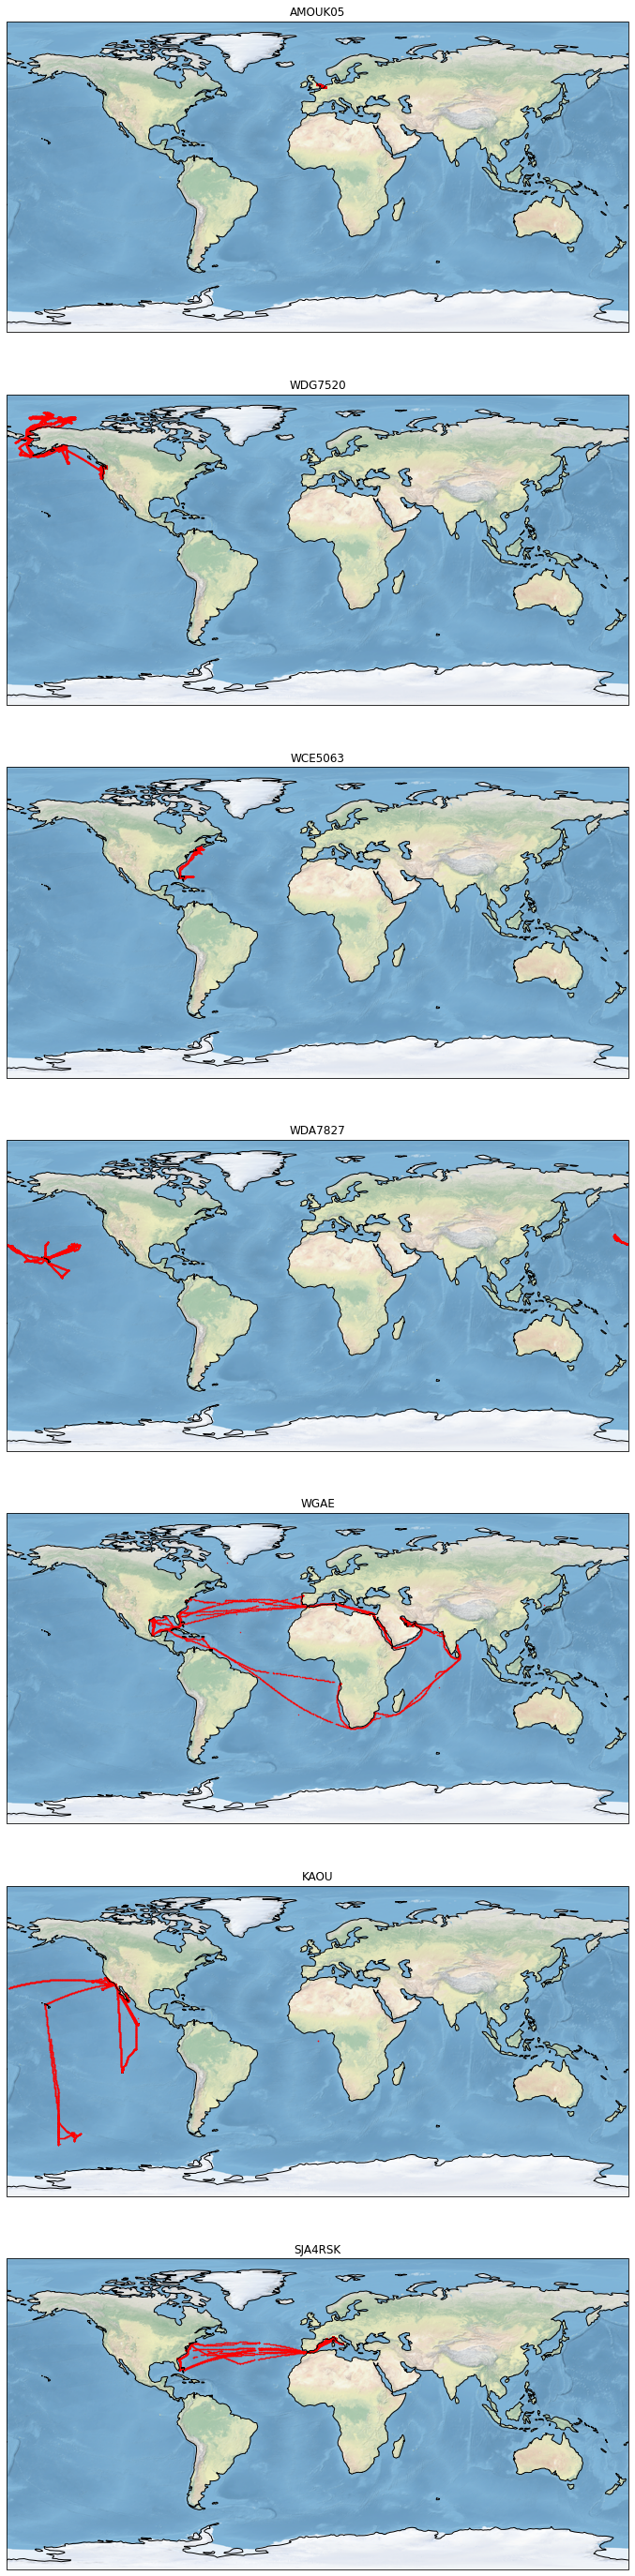

In [5]:
fig, axes = plt.subplots(nrows=7, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,50))

for id, ax in zip(ship_ids, axes):
    ax.set_title(id)
    ax.stock_img()
    ax.coastlines()
    df.loc[df["id"] == id].plot("lon", "lat", kind="scatter", ax=ax, c="red", s=0.2)

## Create trajectory subset

(25.0, 45.0)

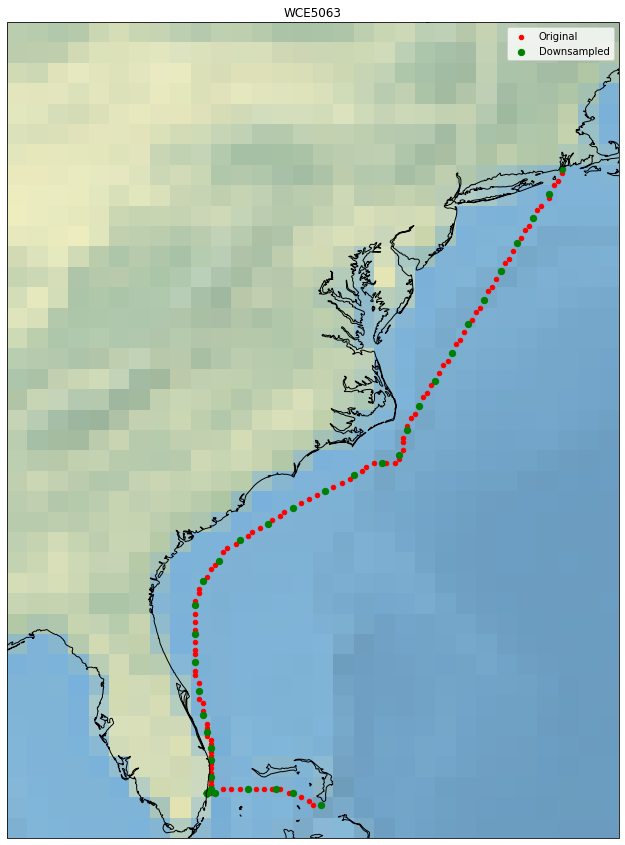

In [86]:
id = "WCE5063"
initial_idx, final_idx = (1171, 1380)

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20,15))
ax.set_title(id)
ax.stock_img()
ax.coastlines()
df.loc[df["id"] == id][initial_idx:final_idx].plot("lon", "lat", kind="scatter", ax=ax, c="red", label="Original")

# Downsampled trajectory
x_downsampled = df.loc[df["id"] == id][initial_idx:final_idx:4]
df.loc[df["id"] == id][initial_idx:final_idx:4].plot("lon", "lat", kind="scatter", ax=ax, c="green", s=40, label="Downsampled")

plt.xlim(-85, -70)
plt.ylim(25, 45)

[17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12]
[16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11]


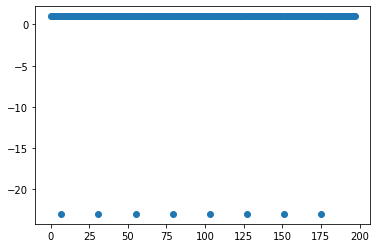

In [60]:
x = df.loc[df["id"] == id][initial_idx:final_idx]
x_hr = x["hr"]
diff = x_hr[1:].values-x_hr[:-1].values
print(x_hr[1:].values[:20])
print(x_hr[:-1].values[:20])
plt.scatter(range(len(diff)), diff)

In [87]:
x.to_csv("{}_subset.csv".format(id))
x_downsampled.to_csv("{}_subset_downsampled.csv".format(id))